<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
train_dir="/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)/train"
val_dir="/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)/test"

In [23]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224),batch_size=1,seed=42)

Found 488 images belonging to 3 classes.
Found 259 images belonging to 3 classes.


In [24]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(3,activation="softmax")])
     

In [25]:
model_1.compile(loss="CategoricalCrossentropy",optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=["accuracy"])
   

In [26]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [31]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [32]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [35]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [37]:
model_1.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [39]:
history=model_1.fit(train_data,validation_data=valid_data, epochs = 60,verbose = 1, callbacks=[lrd,mcp,es])

Epoch 1/60


TypeError: ignored

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [28]:
model=model_1.fit(train_data,epochs=70,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/70
50/50 [==============================] - 92s 2s/step - loss: 1.2611 - accuracy: 0.3200 - val_loss: 1.0980 - val_accuracy: 0.3436
Epoch 2/70
50/50 [==============================] - 15s 298ms/step - loss: 1.0724 - accuracy: 0.4800 - val_loss: 1.1001 - val_accuracy: 0.3436
Epoch 3/70
50/50 [==============================] - 16s 324ms/step - loss: 1.0769 - accuracy: 0.4000 - val_loss: 1.1065 - val_accuracy: 0.3398
Epoch 4/70
50/50 [==============================] - 16s 330ms/step - loss: 1.0847 - accuracy: 0.3000 - val_loss: 1.1044 - val_accuracy: 0.3205


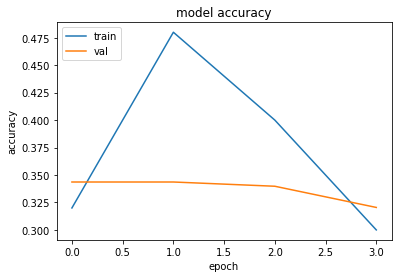

In [29]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

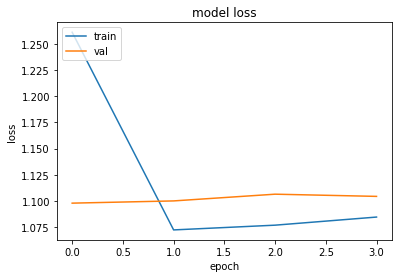

In [30]:

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
     